In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

In [76]:
sales_data = pd.read_excel('../data/raw_data/SampleSize.xlsx', sheet_name= 'Sales Data - From View')
vehi_data = pd.read_excel('../data/raw_data/SampleSize.xlsx', sheet_name= 'Vehicle Data - From Table')
vehi_loc = pd.read_excel('../data/raw_data//SampleSize.xlsx', sheet_name= 'Vehicle Locations - From View')
site_data = pd.read_excel('../data/raw_data/SampleSize.xlsx', sheet_name= 'Site Details - Manual add')

In [4]:
sales_data.head()

,STOCKNO,VEHICLEDES,REGNO,DATEINSTOC,INVOICEDAT,SALETYPEID,SALETYPE,BRANCHNO,SALESEXEC,SALEPRICE,...,Created,Createdby,LastEdit,EditedBy,DeletedDate,LogType,Deleted By,Reason,Unnamed: 89,Unnamed: 90
0,5,Ecoblue Active 300L1 170,OE21EZD,2021-04-01,2021-05-21,128,New Retail,1,R Brant,33165.0,...,2021-05-21 14:18:40.667000,mtrinder,2021-05-21 14:20:14.457000,mtrinder,NaN,NaN,NaN,NaN,NaN,NaN
1,8,1.0 EcoBoost 125 ST-Line 5dr,WM69WMP,2021-04-06,2021-06-28,134,Used Sale BFC VAT Q,1,K Mancey,13332.5,...,2021-06-23 10:55:20.313000,sagutter,2021-06-23 10:56:34.910000,sagutter,NaN,NaN,NaN,NaN,NaN,NaN
2,9,1.0 EcoBoost 125 Titanium 5dr,ET18YJX,2021-04-07,2021-04-21,135,Used Sale BFC Margin,1,G Radulescu,10750.0,...,2021-04-15 11:31:40.730000,JamesRis,2022-11-17 07:43:57.280000,mlau,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1.0 EcoBoost 125 ST-Line 5dr,EA18GZJ,2021-04-07,2021-06-03,135,Used Sale BFC Margin,1,D Barber,12299.0,...,2021-05-31 12:55:49.570000,ReefBS,2022-02-18 13:44:59.350000,wlatimer,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1.5 Zetec 5dr Powershift,FE17JMO,2021-04-07,2021-04-21,135,Used Sale BFC Margin,1,I Kalokoh,8500.0,...,2021-04-14 17:10:29.433000,ReefBS,2022-02-18 12:54:13.173000,wlatimer,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vehi_data.head()

,Stock Number,OutRegNo,Bought From,Last Keeper,Make,Model,Engine Size,Radio Code,Key Code 1,Key Code 2,...,Collected,DateSold,PartExchange,DeliveryCharge,Warranted,PurchaseDate,SupplierText,Recon,DepositDate,Fuel
0,41274,NaN,BCA001,NaN,POLESTAR,2,1.0,NaN,TAG 227,NaN,...,NaN,NaT,NaN,NaN,N,2024-02-10,NaN,NaN,NaN,Electric
1,41275,NaN,SUN00002,NaN,Hyundai,Tucson,1598.0,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,N,NaT,NaN,NaN,NaN,Petrol
2,41276,NaN,SUN00002,NaN,Kia,Sportage,1598.0,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,N,2024-02-10,NaN,NaN,NaN,Hybrid Electric
3,41277,OY24ZXX,FOR002,NaN,FORD,Transit Connect,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,41278,NaN,MEA00001,NaN,Seat,Tarraco,1498.0,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,N,NaT,NaN,NaN,NaN,Petrol


In [6]:
vehi_loc.head()

,Site,SiteName,Stock Number,RegYear,Date Regd,Make,Model,Description,Engine Size,Colour,...,UnpostedAccruals,VAT Qualifying,Date In Stock,Days In Stock,Location,CAPCLEAN,Used Sale Type,CAPRetail,AdjustedSIV,Commercial
0,9,Watford,29498,NaN,2020-09-01,FORD,FIESTA,1.0 EcoBoost 95 ST-Line X Edition 5dr,998,Race red,...,200.0,1,2024-01-30,13,Available,11050.0,Used Sale BFC VAT Q,12850.0,8526.00,0
1,1,Reading,34280,2021.0,2021-06-01,FORD,KUGA,Titanium 2.5 PHEV 5dr Auto,2498,Additional special metallic - Magnetic,...,200.0,1,2024-02-02,10,Available,20700.0,Used Sale BFC VAT Q,23000.0,15111.49,0
2,11,Dunstable,34284,2019.0,2019-03-22,LAND ROVER,DISCOVERY SPORT,2.0 Si4 240 HSE Luxury 5dr Auto,1998,Metallic - Rd,...,225.0,1,2023-12-14,60,Available,21800.0,Used Sale BFC VAT Q,24500.0,19167.33,0
3,11,Dunstable,34470,2019.0,2019-05-31,NISSAN,JUKE,1.6 [112] Tekna 5dr CVT [Bose/Exterior+ Pack],1598,Metallic - Pearl black,...,200.0,1,2024-02-05,7,Available,11150.0,Used Sale BFC VAT Q,13250.0,8783.65,0
4,7,Scunthorpe,36284,2023.0,2023-09-29,FORD,FIESTA,1.0 EcoBoost Titanium 5dr,999,Premium paint - Frozen white,...,200.0,1,2024-01-01,42,Available,NaN,Used Sale BFC VAT Q,NaN,13929.58,0


In [7]:
site_data.head()

,Dealership,Branch No
0,Abingdon,2
1,Banbury,3
2,Dunstable,11
3,Grimsby,6
4,Hemel,10


# Sales Data Analysis

In [8]:
pd.options.display.max_columns = None

In [9]:
sales_data.head(2)

,STOCKNO,VEHICLEDES,REGNO,DATEINSTOC,INVOICEDAT,SALETYPEID,SALETYPE,BRANCHNO,SALESEXEC,SALEPRICE,COSTPRICE,METALPROFIT,ACCCOST,ACCSALE,RECON,FINCOM,FINANCECO,Make,Model,CC,BODYCOLOUR,Mileage,FULLCHASSI,VAT Qualifying,ModID,Trade,WARRSALE,WARRCOST,GAPSALE,GAPCOST,SERVSALE,SERVCOST,SMARTSALE,SMARTCOST,TYREALLOYSALE,TYREALLOYCOST,PAINTPROSALE,PAINTPROCOST,DISCOUNT,RFL,Profit,OTHERBONUS,CRED ACCRUALS,DeliverTo,Name,CustomerID,Title,Forename,Middlename,Surname,CompanyName,Street 1,Street 2,street3,Town,County,Postcode,Country,Email,Email2,Email3,Telephone,Mobile,DearName,Editby,IntroSource,CustomerTypeID,Department,MarketingContact_Email,MarketingContact_Post,MarketingContact_Phone,MarketingContact_SMS,ServiceSafety_Email,ServiceSafety_Post,ServiceSafety_Phone,ServiceSafety_SMS,ManufacturerRecallWarranty_Email,ManufacturerRecallWarranty_Post,ManufacturerRecallWarranty_Phone,ManufacturerRecallWarranty_SMS,ContactConsentUpdatedDate,Created,Createdby,LastEdit,EditedBy,DeletedDate,LogType,Deleted By,Reason,Unnamed: 89,Unnamed: 90
0,5,Ecoblue Active 300L1 170,OE21EZD,2021-04-01,2021-05-21,128,New Retail,1,R Brant,33165.0,28857.75,4307.25,110.0,-5526.00,157.64,0.0,Santander Consumer Finance,Ford,Transit Custom 2.0,2,Chrome Blue,NaN,WF0YXXTTGYLY85709,1,14,No,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-9150.83,330.0,2856.87,7093.46,2860.20,MAD00274,Maddison Plumbing Heating & Gas Svcs Ltd,4001710,NaN,NaN,NaN,NaN,Maddison Plumbing Heating & Ga,57 Chelwood Drive,NaN,NaN,Bath,Somerset,BA22PS,United Kingdom,info@maddisonplumbing.co.uk,info@maddisonplumbing.co.uk,NaN,7770821007,NaN,NaN,mtrinder,NaN,442,Reading Sales,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2021-05-21 14:18:40.667000,mtrinder,2021-05-21 14:20:14.457000,mtrinder,NaN,NaN,NaN,NaN,NaN,NaN
1,8,1.0 EcoBoost 125 ST-Line 5dr,WM69WMP,2021-04-06,2021-06-28,134,Used Sale BFC VAT Q,1,K Mancey,13332.5,10833.33,2499.17,0.0,270.83,100.00,0.0,Santander Consumer Finance,Ford,Focus,999,Grey,12959.0,WF0NXXGCHNKP86179,1,19,No,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.33,0.0,0.00,0.0,2323.99,212.61,558.62,THO03474,Letitia Thomas,4003867,Miss,Letitia,NaN,Thomas,NaN,"Flat 2, 6 Cornwall Road",NaN,NaN,Harrogate,North Yorkshire,HG12PL,United Kingdom,lettythomas@hotmail.co.uk,lettythomas@hotmail.co.uk,NaN,NaN,NaN,Miss Thomas,sagutter,Walk In,445,Reading Sales,1,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-06-23 00:00:00,2021-06-23 10:55:20.313000,sagutter,2021-06-23 10:56:34.910000,sagutter,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sales_data.columns

Index(['STOCKNO', 'VEHICLEDES', 'REGNO', 'DATEINSTOC', 'INVOICEDAT',
       'SALETYPEID', 'SALETYPE', 'BRANCHNO', 'SALESEXEC', 'SALEPRICE',
       'COSTPRICE', 'METALPROFIT', 'ACCCOST', 'ACCSALE', 'RECON', 'FINCOM',
       'FINANCECO', 'Make', 'Model', 'CC', 'BODYCOLOUR', 'Mileage',
       'FULLCHASSI', 'VAT Qualifying', 'ModID', 'Trade', 'WARRSALE',
       'WARRCOST', 'GAPSALE', 'GAPCOST', 'SERVSALE', 'SERVCOST', 'SMARTSALE',
       'SMARTCOST', 'TYREALLOYSALE', 'TYREALLOYCOST', 'PAINTPROSALE',
       'PAINTPROCOST', 'DISCOUNT', 'RFL', 'Profit', 'OTHERBONUS',
       'CRED ACCRUALS', 'DeliverTo', 'Name', 'CustomerID', 'Title', 'Forename',
       'Middlename', 'Surname', 'CompanyName', 'Street 1', 'Street 2',
       'street3', 'Town', 'County', 'Postcode', 'Country', 'Email', 'Email2',
       'Email3', 'Telephone', 'Mobile', 'DearName', 'Editby', 'IntroSource',
       'CustomerTypeID', 'Department', 'MarketingContact_Email',
       'MarketingContact_Post', 'MarketingContact_Phone',
    

In [11]:
sales_data.INVOICEDAT.dtype, sales_data.Make.dtype

(dtype('<M8[ns]'), dtype('O'))

In [12]:
sales_data = sales_data[['STOCKNO', 'INVOICEDAT', 'BRANCHNO', 'Make', 'Model', 'SALETYPE', 'SALEPRICE', 'COSTPRICE', 'METALPROFIT', 'Mileage']]

In [13]:
sales_data.SALETYPE.value_counts().head(24)

SALETYPE
Used PX Margin             13563
Used Sale BFC Margin        6058
New Retail                  5227
New Retail CV               1808
Used Sale BFC VAT Q         1707
New Motabilitiy             1365
Used Sale BFC CV VAT Q      1238
New Trade                   1143
New Fleet                    350
Ex Demo VAT Q                315
Used Sale BFC CV Margin      282
Used PX VAT Q CV             278
Used PX Margin CV            176
Used PX VAT Q                146
Pre Reg VAT Q                 82
Ex Demo VAT Q CV              51
Ex Demo Margin                38
Vat Exempt                     3
Pre Reg VAT Q CV               2
Name: count, dtype: int64

In [14]:
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data

,count
INVOICEDAT,
2021-04-15,5
2021-04-20,1
2021-04-21,5
2021-04-22,3
2021-04-23,3
...,...
2024-02-09,63
2024-02-12,31
2024-02-14,1


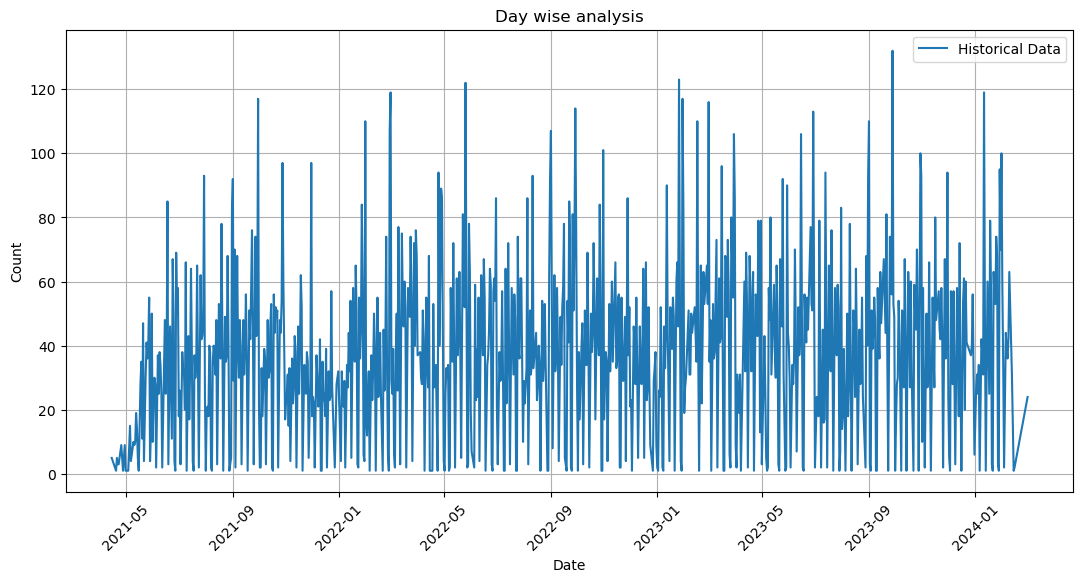

In [15]:
# Plot the historical data and the forecast
plt.figure(figsize=(13, 6))
plt.plot(data.index, data['count'], label='Historical Data')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Day wise analysis')
plt.legend()
plt.grid()
plt.show()

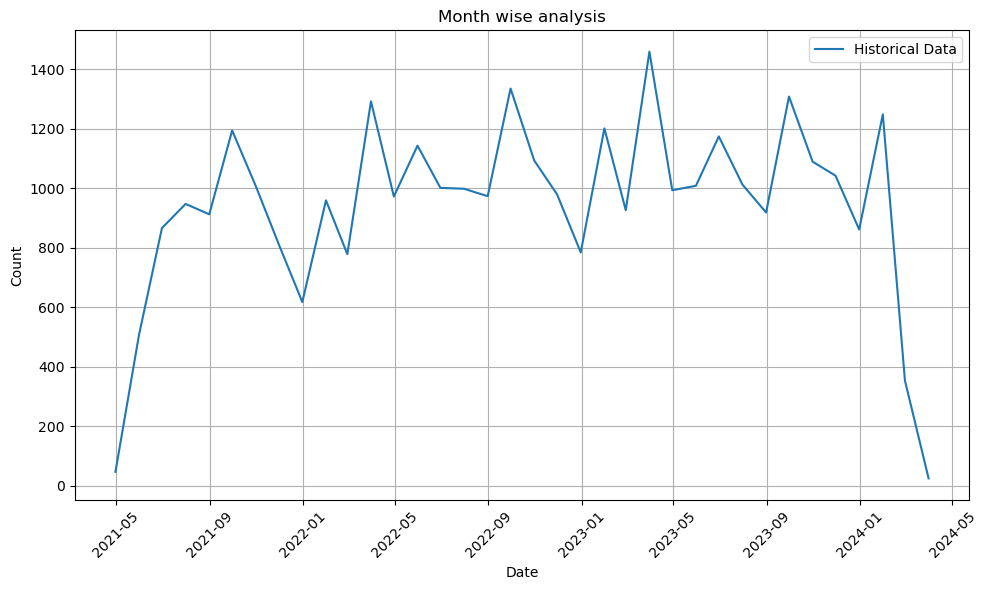

In [16]:
# Ensure the index is a datetime type and prepare data for Prophet
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data.index = pd.to_datetime(data.index)

# Convert the data to monthly frequency and sum values within each month
data = data.resample('M').sum()

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['count'], label='Historical Data')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Month wise analysis')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [17]:
data

,count
INVOICEDAT,
2021-04-30,46
2021-05-31,508
2021-06-30,866
2021-07-31,947
2021-08-31,912
2021-09-30,1194
2021-10-31,1007
2021-11-30,812
2021-12-31,617


In [18]:
sales_data[sales_data['INVOICEDAT'] <= '2021-05-1' ].head()

,STOCKNO,INVOICEDAT,BRANCHNO,Make,Model,SALETYPE,SALEPRICE,COSTPRICE,METALPROFIT,Mileage
2,9,2021-04-21,1,Ford,Ecosport,Used Sale BFC Margin,10750.0,10400.0,291.666667,18138.0
4,11,2021-04-21,1,Ford,Ecosport,Used Sale BFC Margin,8500.0,7550.0,791.666667,23236.0
6,13,2021-04-30,1,Ford,Fiesta,Used Sale BFC Margin,9612.3,8925.0,572.750000,36500.0
7,14,2021-04-20,1,Ford,Focus,Used Sale BFC Margin,12490.0,12000.0,408.333333,11000.0
9,17,2021-04-15,1,Ford,Focus,Used Sale BFC Margin,9999.0,8400.0,1332.500000,20000.0


In [19]:
sales_data = sales_data[sales_data['INVOICEDAT'] >= '2021-05-1' ]

In [20]:
sales_data = sales_data[sales_data['INVOICEDAT'] < '2024-03-1' ] 

In [21]:
sales_data[(sales_data['INVOICEDAT'] >= '2024-02-1')].sort_values('INVOICEDAT')

,STOCKNO,INVOICEDAT,BRANCHNO,Make,Model,SALETYPE,SALEPRICE,COSTPRICE,METALPROFIT,Mileage
32414,38651,2024-02-01,6,VAUXHALL,ASTRA,Used PX Margin,2850.00,3250.00,-400.000000,NaN
32003,38129,2024-02-01,6,AUDI,A1,Used PX Margin,2850.00,3700.00,-850.000000,117060.0
33040,39492,2024-02-01,6,FORD,FOCUS,Used PX Margin,1400.00,1275.00,104.166667,88717.0
32323,38540,2024-02-01,6,VOLKSWAGEN,PASSAT CC,Used PX Margin,700.00,600.00,83.333333,130435.0
33714,40878,2024-02-01,10,FORD,Kuga,New Motabilitiy,26954.17,26711.38,242.790000,NaN
...,...,...,...,...,...,...,...,...,...,...
33769,41115,2024-02-12,10,FORD,Focus,New Motabilitiy,28541.67,27685.42,856.250000,NaN
33830,41379,2024-02-12,6,FORD,Fiesta,New Retail,20558.33,19941.58,616.750000,NaN
33779,41169,2024-02-14,11,FORD,Kuga,New Motabilitiy,33454.17,33016.38,437.790000,NaN
33801,41250,2024-02-15,11,FORD,Puma,New Motabilitiy,24341.67,23611.42,730.250000,NaN


In [22]:
sales_data = sales_data[sales_data['INVOICEDAT'] < '2024-02-1' ] 

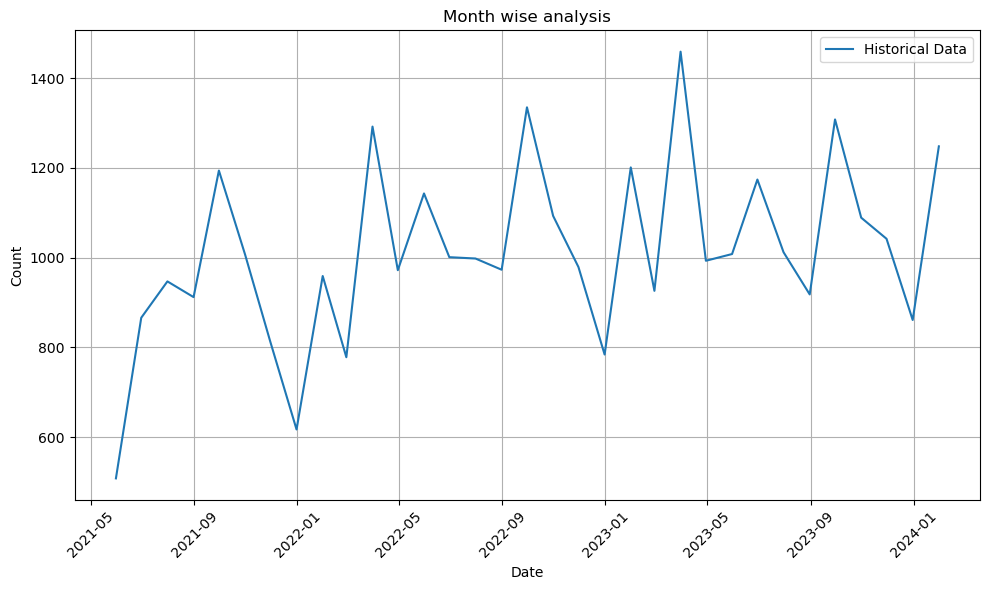

In [23]:
# Ensure the index is a datetime type and prepare data for Prophet
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data.index = pd.to_datetime(data.index)

# Convert the data to monthly frequency and sum values within each month
data = data.resample('M').sum()

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['count'], label='Historical Data')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Month wise analysis')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
pd.options.display.max_rows = None

In [25]:
sales_data.Make.value_counts()

Make
FORD                   16991
Ford                    7688
VAUXHALL                 782
VOLKSWAGEN               634
MERCEDES-BENZ            558
BMW                      535
AUDI                     420
NISSAN                   362
PEUGEOT                  317
TESLA                    285
SEAT                     282
Vauxhall                 246
HYUNDAI                  210
MINI                     208
RENAULT                  204
ford                     199
TOYOTA                   194
SKODA                    183
KIA                      175
CITROEN                  173
FIAT                     171
LAND ROVER               169
Volkswagen               158
VOLVO                    155
HONDA                    136
JAGUAR                   118
MITSUBISHI               111
MAZDA                    108
Nissan                   105
Mercedes                 104
Bmw                       95
Audi                      95
Peugeot                   87
Tesla                     80
Citroen  

# Make Column

In [26]:
pd.reset_option('display.max_rows')

In [27]:
sales_data.Make.nunique()

123

In [28]:
sales_data.shape

(33409, 10)

In [29]:
sales_data.Make.str.lower().nunique()

76

In [30]:
sales_data.Make = sales_data.Make.str.lower()

In [31]:
sales_data.Make.nunique()

76

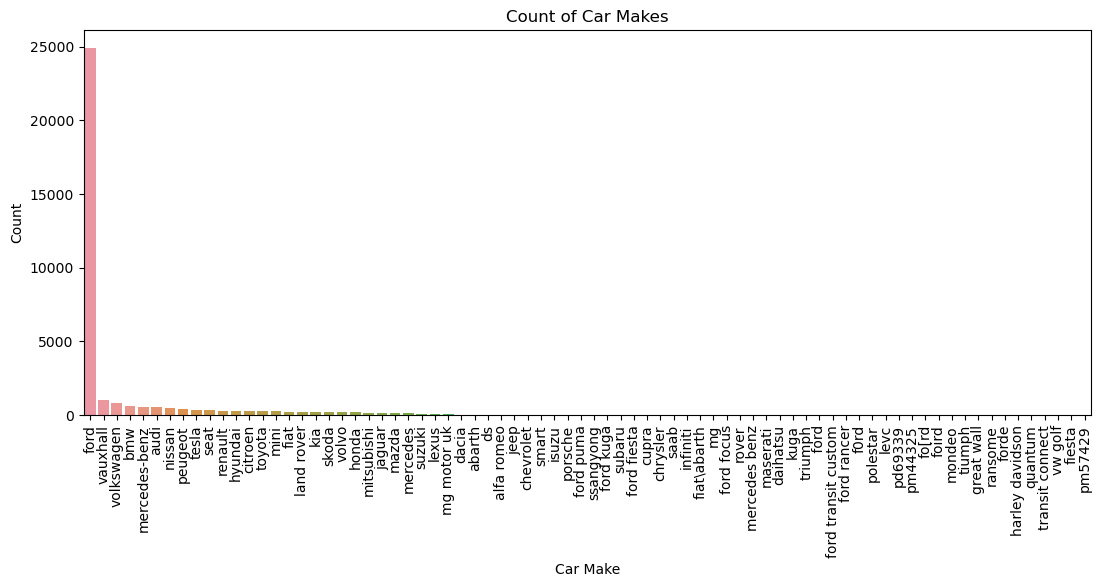

In [32]:
plt.figure(figsize = (13,5))
# Assuming sales_data is your DataFrame
sales_count = sales_data.Make.value_counts()

# Create the bar plot
sn.barplot(x=sales_count.index, y=sales_count.values)

# Add labels and title for clarity
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Count of Car Makes')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

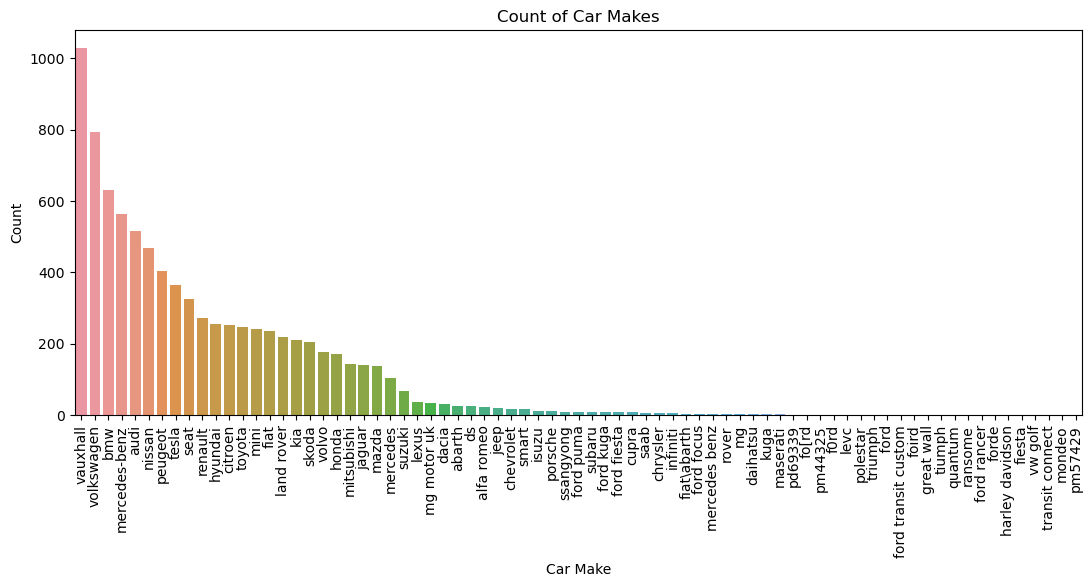

In [33]:
filtered_sales_data = sales_data[sales_data['Make'] != 'ford']
sales_count = filtered_sales_data['Make'].value_counts()

# Create the bar plot
plt.figure(figsize=(13, 5))
sn.barplot(x=sales_count.index, y=sales_count.values)

# Add labels and title for clarity
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Count of Car Makes')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

In [34]:
sales_data.head()

,STOCKNO,INVOICEDAT,BRANCHNO,Make,Model,SALETYPE,SALEPRICE,COSTPRICE,METALPROFIT,Mileage
0,5,2021-05-21,1,ford,Transit Custom 2.0,New Retail,33165.0,28857.75,4307.250000,NaN
1,8,2021-06-28,1,ford,Focus,Used Sale BFC VAT Q,13332.5,10833.33,2499.170000,12959.0
3,10,2021-06-03,1,ford,Ecosport,Used Sale BFC Margin,12299.0,11050.00,1040.833333,21837.0
5,12,2021-07-07,6,ford,Fiesta,Used Sale BFC Margin,14299.0,13000.00,1082.500000,14842.0
8,16,2021-05-14,1,ford,Focus,Used Sale BFC Margin,13710.0,13150.00,466.666667,16250.0


In [35]:
# Step 1: Replace similar or duplicate names to consolidate them
# You can adjust or add replacements based on similarity
sales_data['Make'] = sales_data['Make'].replace({
    ' ford': 'ford', 'fiesta': 'ford', 'ford kuga': 'ford', 'vw golf': 'volkswagen', 
    'mercedes benz': 'mercedes', 'polestar': 'volvo', 'kuga': 'ford',
    'fiat\\abarth': 'fiat', 'abarth': 'fiat', 'f0rd': 'ford',
    'fo[rd': 'ford', 'foird': 'ford', 'forde': 'ford'
})

# Step 2: Count occurrences and categorize low-frequency names
threshold = 139 # You can adjust this threshold for what qualifies as "low-count"
make_counts = sales_data['Make'].value_counts()
low_count_makes = make_counts[make_counts < threshold].index

# Replace low-count names with "Other"
sales_data['Make_new'] = sales_data['Make'].apply(lambda x: 'Other' if x in low_count_makes else x)

# Optional: Verify the results
print(sales_data['Make_new'].value_counts())

Make_new
ford             24894
vauxhall          1028
volkswagen         793
bmw                630
Other              619
mercedes-benz      564
audi               515
nissan             467
peugeot            404
tesla              365
seat               324
renault            271
fiat               264
hyundai            256
citroen            252
toyota             248
mini               242
land rover         220
kia                209
skoda              205
volvo              178
honda              170
mitsubishi         144
jaguar             141
Name: count, dtype: int64


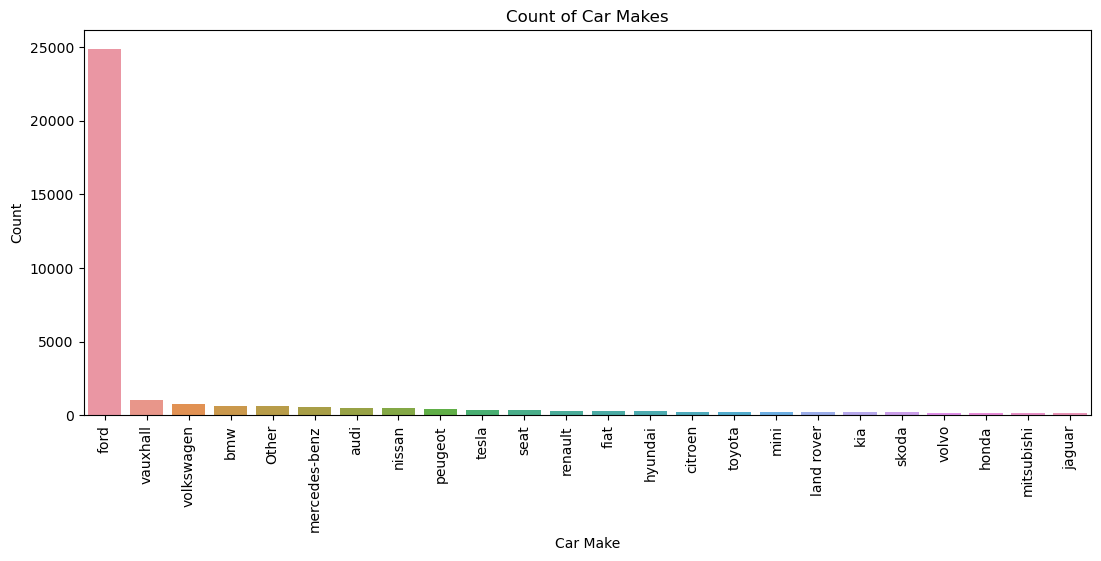

In [36]:
sales_count = sales_data['Make_new'].value_counts()

# Create the bar plot
plt.figure(figsize=(13, 5))
sn.barplot(x=sales_count.index, y=sales_count.values)

# Add labels and title for clarity
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Count of Car Makes')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

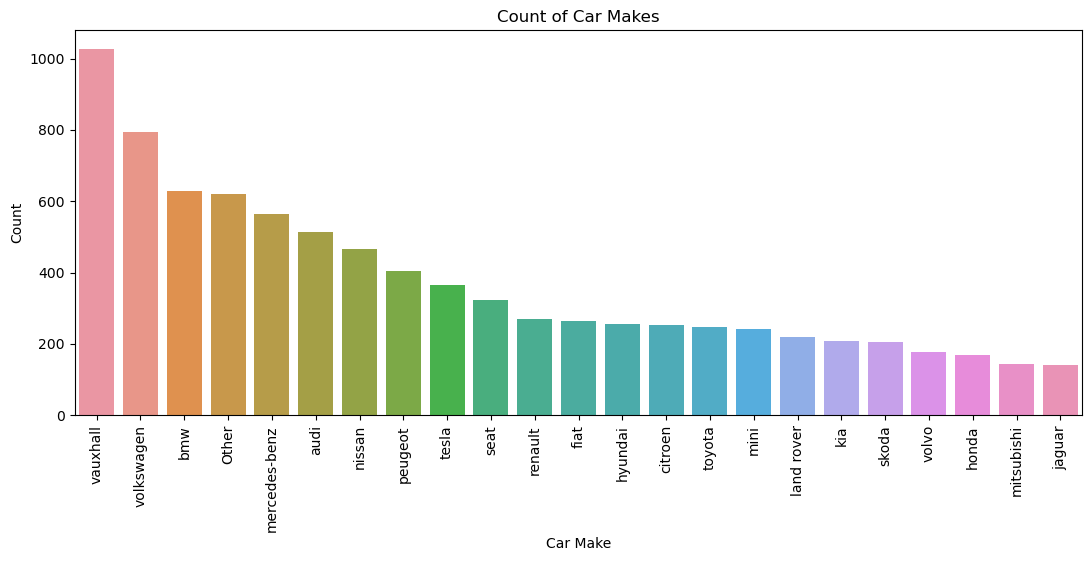

In [37]:
filtered_sales_data = sales_data[sales_data['Make_new'] != 'ford']
sales_count = filtered_sales_data['Make_new'].value_counts()

# Create the bar plot
plt.figure(figsize=(13, 5))
sn.barplot(x=sales_count.index, y=sales_count.values)

# Add labels and title for clarity
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Count of Car Makes')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

# Model column

In [38]:
sales_data.Model.nunique()

944

In [39]:
sales_data.Model = sales_data.Model.str.lower()

In [40]:
sales_data.Model.nunique()

712

In [41]:
sales_data.Model.nunique()

712

In [42]:
car_variants = {
    "Ford Fiesta Variants": [
        "fiesta",
        "fiesta titanium x",
        "fiesta zetec turbo",
        "fiesta vignale",
        "fiesta van",
        "fiesta st-3 turbo hatchback",
        "fiesta titanium turbo hat",
        "fiesta zetec tdci 70 hatc",
        "fiesta titanium 90 tdci h",
        "fiesta edge",
        "fiesta zetec climate",
        "fiesta base tdci car deri",
        "fiesta titanium hatchback",
        "fiesta edge 60",
        "fiesta hatchback special editi",
        "fiesta vignale hatchback"
    ],
    "Ford Focus Variants": [
        "focus",
        "focus rs",
        "focus vignale",
        "focus cc",
        "focus titanium turbo hatc",
        "focus titanium tdci hatch",
        "focus active",
        "focus st-line",
        "focus style",
        "focus lx",
        "focus 1.6 style 5dr",
        "focus hat 1.0 125 titanium x e",
        "focus active x",
        "focus c-max",
        "focus estate",
        "focus diesel hatchback",
        "focus hatchback"
    ],
    "Ford Transit Variants": [
        "transit",
        "transit custom",
        "transit connect",
        "transit custom 2.0",
        "transit courier",
        "transit custom ms-rt",
        "transit custom 290 limite",
        "transit custom 280 l1 die",
        "transit tipper",
        "transit 350 l2 diesel fwd",
        "transit van",
        "transit custom 320 l2 die",
        "transit connect retail"
    ],
    "Ford Kuga Variants": [
        "kuga",
        "kuga titanium edition tdc",
        "kuga st-line first editio",
        "kuga titanium x tdci hatc",
        "kuga vignale",
        "kuga diesel estate",
        "ford new kuga st-line x e"
    ],
    "Ford Puma Variants": [
        "puma",
        "ford puma",
        "puma 1.0 ecb hy mhev 155 st-li",
        "ford puma titanium mhev 1",
        "puma 1.0 ecoboost hbd mhev 125",
        "puma hatchback"
    ],
    "Ford Ranger Variants": [
        "ranger",
        "ranger diesel special edi",
        "ranger diesel pick up dou",
        "ranger ms-rt"
    ],
    "Ford Mondeo Variants": [
        "mondeo",
        "mondeo vignale",
        "mondeo titanium x bs ed t",
        "mondeo diesel estate"
    ],
    "Volkswagen Golf Variants": [
        "golf",
        "golf sv",
        "golf plus",
        "golf match hatchback"
    ],
    "BMW Series Models": [
        "1 series",
        "2 series",
        "3 series",
        "4 series",
        "5 series",
        "6 series",
        "8 series",
        "320d m sport auto",
        "330i m sport a",
        "116d m sport auto",
        "m2",
        "m3",
        "m4",
        "m5"
    ],
    "Audi A-Series Models": [
        "a1",
        "a3",
        "a4",
        "a5",
        "a6",
        "a7",
        "a8"
    ],
    "Nissan Qashqai Variants": [
        "qashqai",
        "qashqai visia",
        "qashqai+2",
        "qashqai acenta dci 2wd",
        "qashqai diesel hatchback"
    ],
    "Mini Cooper Variants": [
        "cooper",
        "cooper clubman",
        "cooper clubman estate"
    ],
    "Land Rover Range Rover Variants": [
        "range rover",
        "range rover evoque",
        "range rover velar",
        "range rover sport"
    ]
}




# Replace models in 'Model' column based on car_variants
def map_variants(model):
    for main_model, variants in car_variants.items():
        if model in variants:
            return main_model
    return model  # Return original if no match found

sales_data['Model'] = sales_data['Model'].apply(map_variants)

In [43]:
sales_data['Model'].value_counts().head(50)

Model
Ford Fiesta Variants               5399
Ford Focus Variants                3837
Ford Puma Variants                 3785
Ford Kuga Variants                 3215
Ford Transit Variants              3080
ecosport                           1104
Ford Ranger Variants                950
ford newtrade                       813
BMW Series Models                   497
mustang                             402
model 3                             341
Audi A-Series Models                334
Ford Mondeo Variants                305
corsa                               289
Volkswagen Golf Variants            268
s-max                               258
galaxy                              242
mustang mach-e                      213
Nissan Qashqai Variants             208
astra                               207
a class                             191
c-max                               172
ka+                                 156
polo                                150
Land Rover Range Rover Variants   

In [44]:
# Step 1: Replace similar or duplicate names to consolidate them
# You can adjust or add replacements based on similarity
# Make a copy of the 'Model' column to apply changes
sales_data['Model_new'] = sales_data['Model']

# Loop through each category in car_variants to replace values
for category, models in car_variants.items():
    sales_data['Model_new'] = sales_data['Model_new'].replace(models, category)

# Step 2: Count occurrences and categorize low-frequency names
threshold = 45 # You can adjust this threshold for what qualifies as "low-count"
make_counts = sales_data['Model_new'].value_counts()
low_count_makes = make_counts[make_counts < threshold].index

# Replace low-count names with "Other"
sales_data['Model_new'] = sales_data['Model_new'].apply(lambda x: 'Other' if x in low_count_makes else x)

# Optional: Verify the results
print(sales_data['Model_new'].value_counts())

Model_new
Ford Fiesta Variants               5399
Ford Focus Variants                3837
Ford Puma Variants                 3785
Other                              3758
Ford Kuga Variants                 3215
Ford Transit Variants              3080
ecosport                           1104
Ford Ranger Variants                950
ford newtrade                       813
BMW Series Models                   497
mustang                             402
model 3                             341
Audi A-Series Models                334
Ford Mondeo Variants                305
corsa                               289
Volkswagen Golf Variants            268
s-max                               258
galaxy                              242
mustang mach-e                      213
Nissan Qashqai Variants             208
astra                               207
a class                             191
c-max                               172
ka+                                 156
polo                          

In [45]:
sales_data['Model_new'].value_counts().count()

59

In [46]:
sales_data.to_csv(r'C:\Users\amank\OneDrive\Desktop\Car_Forcasting\data\processed_data\sales_data_clean.csv', index=False)

# Vehicle Data Analysis

In [47]:
vehi_data.head(3)

,Stock Number,OutRegNo,Bought From,Last Keeper,Make,Model,Engine Size,Radio Code,Key Code 1,Key Code 2,Key Code 3,Key Code 4,Alarm Code,Date Regd,Date In Stock,Colour,Mileage,Correct Miles,MOT Due,Cost,Retail,VAT,SIV,Notes,Advert,Sold,Type,New Vehicle,VAT Qualifying,Invoiced,Invoice Number,Consignment Transfer,Transfer Date,Trim,Body,Transmission,HPI Checked,HPI Date,FinanceExpires,Recall1,Recall2,Recall3,Recall4,Owners,Photograph,Finance Amount,Finance Settlement,Trade In Allowance,Cash Deposit,MBI,Cost Of MBI,IPT,Cost Of IPT,RFL,Cost Of RFL,Reconditioning,ReCon1,ReCon2,ReCon3,ReCon4,ReCon5,ReCon6,RC Cost1,RC Cost2,RC Cost3,RC Cost4,RC Cost5,RC Cost6,CarNom,CarTc,CarTax,RFLnom,RFLtc,RFLtax,MBInom,MBItc,MBItax,IPTnom,IPTtc,IPTtax,SOR,VehicleType,Status,COC,Registered,CollectionDate,Collected,DateSold,PartExchange,DeliveryCharge,Warranted,PurchaseDate,SupplierText,Recon,DepositDate,Fuel
0,41274,NaN,BCA001,NaN,POLESTAR,2,1.0,NaN,TAG 227,NaN,NaN,NaN,NaN,2020-11-18 00:00:00,2024-02-09,Metallic - Thunder,5937.0,0,NaN,19250.0,24999.1667,4999.8333,19250.0,NaN,NaN,0,NaN,0,1,0,NaN,NaN,NaN,Weave Tech cloth - Charcoal with black a,Saloon,Automatic,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65970251.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Q,In Stock,NaN,NaN,NaN,NaN,NaT,NaN,NaN,N,2024-02-10,NaN,NaN,NaN,Electric
1,41275,NaN,SUN00002,NaN,Hyundai,Tucson,1598.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-30 00:00:00,2024-02-08,Black,15967.0,0,NaN,20000.0,NaN,0.0000,20000.0,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,Estate,Manual,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65970251.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,In Stock,NaN,NaN,NaN,NaN,NaT,NaN,NaN,N,NaT,NaN,NaN,NaN,Petrol
2,41276,NaN,SUN00002,NaN,Kia,Sportage,1598.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21 00:00:00,2024-02-08,Red,25341.0,0,NaN,19000.0,22999.0000,0.0000,19000.0,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,Estate,Semi Auto,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65970251.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,In Stock,NaN,NaN,NaN,NaN,NaT,NaN,NaN,N,2024-02-10,NaN,NaN,NaN,Hybrid Electric


In [48]:
vehi_data.columns

Index(['Stock Number', 'OutRegNo', 'Bought From', 'Last Keeper', 'Make',
       'Model', 'Engine Size', 'Radio Code', 'Key Code 1', 'Key Code 2',
       'Key Code 3', 'Key Code 4', 'Alarm Code', 'Date Regd', 'Date In Stock',
       'Colour', 'Mileage', 'Correct Miles', 'MOT Due', 'Cost', 'Retail',
       'VAT', 'SIV', 'Notes', 'Advert', 'Sold', 'Type', 'New Vehicle',
       'VAT Qualifying', 'Invoiced', 'Invoice Number', 'Consignment Transfer',
       'Transfer Date', 'Trim', 'Body', 'Transmission', 'HPI Checked',
       'HPI Date', 'FinanceExpires', 'Recall1', 'Recall2', 'Recall3',
       'Recall4', 'Owners', 'Photograph', 'Finance Amount',
       'Finance Settlement', 'Trade In Allowance', 'Cash Deposit', 'MBI',
       'Cost Of MBI', 'IPT', 'Cost Of IPT', 'RFL', 'Cost Of RFL',
       'Reconditioning', 'ReCon1', 'ReCon2', 'ReCon3', 'ReCon4', 'ReCon5',
       'ReCon6', 'RC Cost1', 'RC Cost2', 'RC Cost3', 'RC Cost4', 'RC Cost5',
       'RC Cost6', 'CarNom', 'CarTc', 'CarTax', 'RFLnom', 

In [49]:
vehi_data = vehi_data[['Date In Stock', 'Make', 'Model', 'Status', 'Engine Size',  'Mileage',  'Cost', 'Retail',  'VAT', 'Colour']]

In [50]:
stock = vehi_data[vehi_data['Status'] == 'In Stock']

In [51]:
stock

,Date In Stock,Make,Model,Status,Engine Size,Mileage,Cost,Retail,VAT,Colour
0,2024-02-09,POLESTAR,2,In Stock,1.0,5937.0,19250.0,24999.1667,4999.8333,Metallic - Thunder
1,2024-02-08,Hyundai,Tucson,In Stock,1598.0,15967.0,20000.0,NaN,0.0000,Black
2,2024-02-08,Kia,Sportage,In Stock,1598.0,25341.0,19000.0,22999.0000,0.0000,Red
4,2024-02-08,Seat,Tarraco,In Stock,1498.0,34667.0,14875.0,NaN,0.0000,Green
5,2024-02-08,Mini,Hatch,In Stock,0.0,6400.0,13500.0,NaN,0.0000,Green
...,...,...,...,...,...,...,...,...,...,...
119,2024-02-12,BMW,X5,In Stock,1242.0,NaN,4200.0,NaN,NaN,Solid - Alpine white
120,2024-02-12,Fiat,500,In Stock,1242.0,40000.0,2400.0,NaN,NaN,White
121,2024-02-12,HONDA,CR-V,In Stock,2204.0,137000.0,500.0,NaN,NaN,Pearl - Crystal black
122,2024-02-12,FORD,ECOSPORT,In Stock,998.0,35700.0,4000.0,NaN,NaN,Metallic - Kinetic blue


In [52]:
stock['Make'].nunique()

26

In [53]:
# Step 1: Replace similar or duplicate names to consolidate them
# You can adjust or add replacements based on similarity
stock['Make'] = stock['Make'].str.lower()
stock['Make_new'] = stock['Make'].replace({
    ' ford': 'ford', 'fiesta': 'ford', 'ford kuga': 'ford', 'vw golf': 'volkswagen', 
    'mercedes benz': 'mercedes', 'polestar': 'volvo', 'kuga': 'ford',
    'fiat\\abarth': 'fiat', 'abarth': 'fiat', 'f0rd': 'ford',
    'fo[rd': 'ford', 'foird': 'ford', 'forde': 'ford'
})

In [54]:
stock['Make'].nunique()

19

In [55]:
stock.head()

,Date In Stock,Make,Model,Status,Engine Size,Mileage,Cost,Retail,VAT,Colour,Make_new
0,2024-02-09,polestar,2,In Stock,1.0,5937.0,19250.0,24999.1667,4999.8333,Metallic - Thunder,volvo
1,2024-02-08,hyundai,Tucson,In Stock,1598.0,15967.0,20000.0,NaN,0.0000,Black,hyundai
2,2024-02-08,kia,Sportage,In Stock,1598.0,25341.0,19000.0,22999.0000,0.0000,Red,kia
4,2024-02-08,seat,Tarraco,In Stock,1498.0,34667.0,14875.0,NaN,0.0000,Green,seat
5,2024-02-08,mini,Hatch,In Stock,0.0,6400.0,13500.0,NaN,0.0000,Green,mini


In [56]:
stock.Make_new.value_counts().head()

Make_new
ford      39
bmw        9
audi       6
seat       4
nissan     4
Name: count, dtype: int64

In [57]:
# List of models to be replaced
models_to_replace = list(sales_data[sales_data['Make_new'] == 'Other'].Make.unique())

# Replace all occurrences in the list with 'Others'
stock['Make_new'] = stock['Make'].where(~stock['Make'].isin(models_to_replace), 'Others')

In [58]:
stock.Make_new.value_counts()

Make_new
ford          39
bmw            9
audi           6
seat           4
nissan         4
vauxhall       4
peugeot        3
jaguar         2
kia            2
volkswagen     2
Others         2
fiat           1
toyota         1
mitsubishi     1
polestar       1
hyundai        1
land rover     1
mini           1
honda          1
Name: count, dtype: int64

In [59]:
# Lowercase the 'Model' column
stock['Model'] = stock['Model'].str.lower()

# Dictionary of car variants
car_variants = {
    "Ford Fiesta Variants": [
        "fiesta",
        "fiesta titanium x",
        "fiesta zetec turbo",
        "fiesta vignale",
        "fiesta van",
        "fiesta st-3 turbo hatchback",
        "fiesta titanium turbo hat",
        "fiesta zetec tdci 70 hatc",
        "fiesta titanium 90 tdci h",
        "fiesta edge",
        "fiesta zetec climate",
        "fiesta base tdci car deri",
        "fiesta titanium hatchback",
        "fiesta edge 60",
        "fiesta hatchback special editi",
        "fiesta vignale hatchback"
    ],
    "Ford Focus Variants": [
        "focus",
        "focus rs",
        "focus vignale",
        "focus cc",
        "focus titanium turbo hatc",
        "focus titanium tdci hatch",
        "focus active",
        "focus st-line",
        "focus style",
        "focus lx",
        "focus 1.6 style 5dr",
        "focus hat 1.0 125 titanium x e",
        "focus active x",
        "focus c-max",
        "focus estate",
        "focus diesel hatchback",
        "focus hatchback"
    ],
    "Ford Transit Variants": [
        "transit",
        "transit custom",
        "transit connect",
        "transit custom 2.0",
        "transit courier",
        "transit custom ms-rt",
        "transit custom 290 limite",
        "transit custom 280 l1 die",
        "transit tipper",
        "transit 350 l2 diesel fwd",
        "transit van",
        "transit custom 320 l2 die",
        "transit connect retail"
    ],
    "Ford Kuga Variants": [
        "kuga",
        "kuga titanium edition tdc",
        "kuga st-line first editio",
        "kuga titanium x tdci hatc",
        "kuga vignale",
        "kuga diesel estate",
        "ford new kuga st-line x e"
    ],
    "Nissan Qashqai Variants": [
        "qashqai",
        "qashqai visia",
        "qashqai+2",
        "qashqai acenta dci 2wd",
        "qashqai diesel hatchback"
    ],
    "Mini Cooper Variants": [
        "cooper",
        "cooper clubman",
        "cooper clubman estate"
    ]
}


# Replace models in 'Model' column based on car_variants
def map_variants(model):
    for main_model, variants in car_variants.items():
        if model in variants:
            return main_model
    return model  # Return original if no match found

stock['Model'] = stock['Model'].apply(map_variants)
stock.tail(20)

,Date In Stock,Make,Model,Status,Engine Size,Mileage,Cost,Retail,VAT,Colour,Make_new
99,2024-02-09,nissan,x-trail,In Stock,1598.0,79759.0,7600.00,NaN,0.0,Metallic - Titanium olive,nissan
100,2024-02-09,ford,Ford Fiesta Variants,In Stock,998.0,67390.0,2750.00,NaN,0.0,Metallic - Deep impact blue,ford
101,2024-02-09,ford,Ford Fiesta Variants,In Stock,998.0,74227.0,2500.00,NaN,0.0,Solid - Race red,ford
104,2024-02-10,ford,Ford Fiesta Variants,In Stock,999.0,NaN,NaN,NaN,0.0,Freedom Blue,ford
106,2024-02-12,ford,ecosport,In Stock,998.0,58800.0,7795.64,NaN,NaN,Additional premium paint - Agate Black,ford
108,2024-02-12,ford,Ford Focus Variants,In Stock,1798.0,60591.0,750.00,NaN,NaN,Metallic - Panther black,ford
109,2024-02-12,ford,s-max,In Stock,1997.0,NaN,2000.00,NaN,NaN,Metallic - Hypnotic Silver,ford
110,2024-02-12,seat,ibiza,In Stock,1390.0,75000.0,3300.00,NaN,NaN,Special Solid - White,seat
111,2024-02-12,vauxhall,zafira,In Stock,1686.0,69778.0,1000.00,NaN,NaN,Black,vauxhall
112,2024-02-12,toyota,yaris,In Stock,1497.0,46402.0,9400.00,NaN,NaN,Metallic - Nebula blue,toyota


In [60]:
# List of models to be replaced
models_to_replace = list(sales_data[sales_data['Model_new'] == 'Other'].Model.unique())

# Replace all occurrences in the list with 'Others'
stock['Model_new'] = stock['Model'].where(~stock['Model'].isin(models_to_replace), 'Others')

In [61]:
stock['Model_new'].value_counts()

Model_new
Others                     14
Ford Fiesta Variants       12
Ford Focus Variants         7
Ford Kuga Variants          5
puma                        4
Ford Transit Variants       4
2 series                    2
tourneo connect             2
s-max                       2
Nissan Qashqai Variants     2
a1                          2
ibiza                       2
ecosport                    2
a3                          2
3 series                    2
mx-30                       1
x-trail                     1
5 series                    1
zafira                      1
yaris                       1
golf                        1
tucson                      1
mondeo                      1
vivaro                      1
sportage                    1
juke                        1
1 series                    1
range rover evoque          1
x1                          1
astra                       1
Name: count, dtype: int64

In [62]:
stock

,Date In Stock,Make,Model,Status,Engine Size,Mileage,Cost,Retail,VAT,Colour,Make_new,Model_new
0,2024-02-09,polestar,NaN,In Stock,1.0,5937.0,19250.0,24999.1667,4999.8333,Metallic - Thunder,polestar,NaN
1,2024-02-08,hyundai,tucson,In Stock,1598.0,15967.0,20000.0,NaN,0.0000,Black,hyundai,tucson
2,2024-02-08,kia,sportage,In Stock,1598.0,25341.0,19000.0,22999.0000,0.0000,Red,kia,sportage
4,2024-02-08,seat,tarraco,In Stock,1498.0,34667.0,14875.0,NaN,0.0000,Green,seat,Others
5,2024-02-08,mini,hatch,In Stock,0.0,6400.0,13500.0,NaN,0.0000,Green,mini,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2024-02-12,bmw,x5,In Stock,1242.0,NaN,4200.0,NaN,NaN,Solid - Alpine white,bmw,Others
120,2024-02-12,fiat,NaN,In Stock,1242.0,40000.0,2400.0,NaN,NaN,White,fiat,NaN
121,2024-02-12,honda,cr-v,In Stock,2204.0,137000.0,500.0,NaN,NaN,Pearl - Crystal black,honda,Others
122,2024-02-12,ford,ecosport,In Stock,998.0,35700.0,4000.0,NaN,NaN,Metallic - Kinetic blue,ford,ecosport


In [65]:
stock = stock.dropna(subset=['Make_new', 'Model_new'])

In [66]:
stock.to_csv(r'C:\Users\amank\OneDrive\Desktop\Car_Forcasting\data\processed_data\stock_data_clean.csv', index=False)

In [77]:
vehi_loc

,Site,SiteName,Stock Number,RegYear,Date Regd,Make,Model,Description,Engine Size,Colour,Trim,Transmission,Fuel,Body,Mileage,Bought From,Retail,Cost,ReconCostTotal,UnpostedAccruals,VAT Qualifying,Date In Stock,Days In Stock,Location,CAPCLEAN,Used Sale Type,CAPRetail,AdjustedSIV,Commercial
0,9,Watford,29498,NaN,2020-09-01,FORD,FIESTA,1.0 EcoBoost 95 ST-Line X Edition 5dr,998,Race red,Red pack - Part leather - Black with sil,Manual,Petrol,Hatchback,36487.0,SCO00001,9936.6667,11838.33,530.00,200.0,1,2024-01-30,13,Available,11050.0,Used Sale BFC VAT Q,12850.0,8526.00,0
1,1,Reading,34280,2021.0,2021-06-01,FORD,KUGA,Titanium 2.5 PHEV 5dr Auto,2498,Additional special metallic - Magnetic,Salerno partial leather - Ray in Ebony,Automatic,Plug In Hybrid,SUV,19467.0,BCA001,17436.6667,17166.67,558.40,200.0,1,2024-02-02,10,Available,20700.0,Used Sale BFC VAT Q,23000.0,15111.49,0
2,11,Dunstable,34284,2019.0,2019-03-22,LAND ROVER,DISCOVERY SPORT,2.0 Si4 240 HSE Luxury 5dr Auto,1998,Metallic - Rd,Windsor Leather - Ebony,Automatic,Petrol,SUV,33189.0,ARV00001,19582.5000,21666.67,464.78,225.0,1,2023-12-14,60,Available,21800.0,Used Sale BFC VAT Q,24500.0,19167.33,0
3,11,Dunstable,34470,2019.0,2019-05-31,NISSAN,JUKE,1.6 [112] Tekna 5dr CVT [Bose/Exterior+ Pack],1598,Metallic - Pearl black,Leather - Black,Automatic,Petrol,SUV,21157.0,ALD00001,10415.8333,10208.33,368.61,200.0,1,2024-02-05,7,Available,11150.0,Used Sale BFC VAT Q,13250.0,8783.65,0
4,7,Scunthorpe,36284,2023.0,2023-09-29,FORD,FIESTA,1.0 EcoBoost Titanium 5dr,999,Premium paint - Frozen white,Cloth - Black with metal grey stitching,Manual,Petrol,NaN,50.0,FOR002,14103.3333,16902.25,135.00,200.0,1,2024-01-01,42,Available,NaN,Used Sale BFC VAT Q,NaN,13929.58,0
5,9,Watford,36325,2023.0,2023-09-29,FORD,FIESTA,1.0 EcoBoost Titanium 5dr,999,Exclusive paint - Magnetic,Cloth - Black with metal grey stitching,Manual,Petrol,NaN,NaN,FOR002,14999.1667,17807.58,135.00,200.0,1,2024-01-01,42,Available,NaN,Used Sale BFC VAT Q,NaN,15083.74,0
6,7,Scunthorpe,36336,2023.0,2023-09-29,FORD,FOCUS,1.0 EcoBoost Titanium X 5dr,999,Premium paint - Chrome blue,Full sensico premium seat - Ebony with m,Manual,Petrol,NaN,50.0,FOR002,18332.5000,23433.58,NaN,NaN,1,2024-01-01,42,Sold,NaN,Used Sale BFC VAT Q,NaN,20261.43,0
7,11,Dunstable,36693,NaN,2021-04-30,MERCEDES-BENZ,A CLASS,A220d AMG Line 5dr Auto,1950,Metallic - Cosmos black,Artico man-made leather/Microfibre Dinam,Automatic,Diesel,Hatchback,30329.0,ARV00001,16915.8333,16416.67,440.00,200.0,1,2024-01-30,13,Available,19650.0,Used Sale BFC VAT Q,21750.0,15653.33,0
8,1,Reading,36842,2021.0,2021-08-06,FORD,KUGA,2.5 FHEV ST-Line Edition 5dr CVT,2496,Exclusive paint - Lucid red,Rapton black cloth with partial premium,Automatic,Hybrid,SUV,7284.0,CAR002,20353.3333,18666.67,477.61,988.0,1,2023-12-17,57,Available,21850.0,Used Sale BFC VAT Q,24250.0,18666.67,0
9,11,Dunstable,37567,2018.0,2018-09-28,HONDA,CIVIC,1.0 VTEC Turbo 126 EX 5dr CVT [Tech Pack],988,Solid - Rallye Red,Leather - Black,Automatic,Petrol,Hatchback,55762.0,ARV00001,10415.8333,8916.67,300.00,248.0,1,2024-02-02,10,Available,11700.0,Used Sale BFC VAT Q,13700.0,9481.34,0


In [78]:
vehi_loc = vehi_loc[vehi_loc['Location'] == 'Available']

In [79]:
vehi_loc

,Site,SiteName,Stock Number,RegYear,Date Regd,Make,Model,Description,Engine Size,Colour,Trim,Transmission,Fuel,Body,Mileage,Bought From,Retail,Cost,ReconCostTotal,UnpostedAccruals,VAT Qualifying,Date In Stock,Days In Stock,Location,CAPCLEAN,Used Sale Type,CAPRetail,AdjustedSIV,Commercial
0,9,Watford,29498,NaN,2020-09-01,FORD,FIESTA,1.0 EcoBoost 95 ST-Line X Edition 5dr,998,Race red,Red pack - Part leather - Black with sil,Manual,Petrol,Hatchback,36487.0,SCO00001,9936.6667,11838.33,530.00,200.0,1,2024-01-30,13,Available,11050.0,Used Sale BFC VAT Q,12850.0,8526.00,0
1,1,Reading,34280,2021.0,2021-06-01,FORD,KUGA,Titanium 2.5 PHEV 5dr Auto,2498,Additional special metallic - Magnetic,Salerno partial leather - Ray in Ebony,Automatic,Plug In Hybrid,SUV,19467.0,BCA001,17436.6667,17166.67,558.40,200.0,1,2024-02-02,10,Available,20700.0,Used Sale BFC VAT Q,23000.0,15111.49,0
2,11,Dunstable,34284,2019.0,2019-03-22,LAND ROVER,DISCOVERY SPORT,2.0 Si4 240 HSE Luxury 5dr Auto,1998,Metallic - Rd,Windsor Leather - Ebony,Automatic,Petrol,SUV,33189.0,ARV00001,19582.5000,21666.67,464.78,225.0,1,2023-12-14,60,Available,21800.0,Used Sale BFC VAT Q,24500.0,19167.33,0
3,11,Dunstable,34470,2019.0,2019-05-31,NISSAN,JUKE,1.6 [112] Tekna 5dr CVT [Bose/Exterior+ Pack],1598,Metallic - Pearl black,Leather - Black,Automatic,Petrol,SUV,21157.0,ALD00001,10415.8333,10208.33,368.61,200.0,1,2024-02-05,7,Available,11150.0,Used Sale BFC VAT Q,13250.0,8783.65,0
4,7,Scunthorpe,36284,2023.0,2023-09-29,FORD,FIESTA,1.0 EcoBoost Titanium 5dr,999,Premium paint - Frozen white,Cloth - Black with metal grey stitching,Manual,Petrol,NaN,50.0,FOR002,14103.3333,16902.25,135.00,200.0,1,2024-01-01,42,Available,NaN,Used Sale BFC VAT Q,NaN,13929.58,0
5,9,Watford,36325,2023.0,2023-09-29,FORD,FIESTA,1.0 EcoBoost Titanium 5dr,999,Exclusive paint - Magnetic,Cloth - Black with metal grey stitching,Manual,Petrol,NaN,NaN,FOR002,14999.1667,17807.58,135.00,200.0,1,2024-01-01,42,Available,NaN,Used Sale BFC VAT Q,NaN,15083.74,0
7,11,Dunstable,36693,NaN,2021-04-30,MERCEDES-BENZ,A CLASS,A220d AMG Line 5dr Auto,1950,Metallic - Cosmos black,Artico man-made leather/Microfibre Dinam,Automatic,Diesel,Hatchback,30329.0,ARV00001,16915.8333,16416.67,440.00,200.0,1,2024-01-30,13,Available,19650.0,Used Sale BFC VAT Q,21750.0,15653.33,0
8,1,Reading,36842,2021.0,2021-08-06,FORD,KUGA,2.5 FHEV ST-Line Edition 5dr CVT,2496,Exclusive paint - Lucid red,Rapton black cloth with partial premium,Automatic,Hybrid,SUV,7284.0,CAR002,20353.3333,18666.67,477.61,988.0,1,2023-12-17,57,Available,21850.0,Used Sale BFC VAT Q,24250.0,18666.67,0
9,11,Dunstable,37567,2018.0,2018-09-28,HONDA,CIVIC,1.0 VTEC Turbo 126 EX 5dr CVT [Tech Pack],988,Solid - Rallye Red,Leather - Black,Automatic,Petrol,Hatchback,55762.0,ARV00001,10415.8333,8916.67,300.00,248.0,1,2024-02-02,10,Available,11700.0,Used Sale BFC VAT Q,13700.0,9481.34,0
10,1,Reading,37618,2020.0,2020-10-20,SKODA,KODIAQ,SE L 5dr [7 Seat] 1.5 TSI AUTO,1498,Blue,Leather - Black,Automatic,Petrol,Estate,36453.0,AST00006,16603.3333,15500.00,300.00,200.0,1,2024-02-08,4,Available,19450.0,Used Sale BFC VAT Q,21750.0,15500.00,0


In [83]:
vehi_loc1 = vehi_loc[['Date In Stock', 'Site', 'SiteName', 'Make', 'Model']]

In [84]:
vehi_loc1

,Date In Stock,Site,SiteName,Make,Model
0,2024-01-30,9,Watford,FORD,FIESTA
1,2024-02-02,1,Reading,FORD,KUGA
2,2023-12-14,11,Dunstable,LAND ROVER,DISCOVERY SPORT
3,2024-02-05,11,Dunstable,NISSAN,JUKE
4,2024-01-01,7,Scunthorpe,FORD,FIESTA
5,2024-01-01,9,Watford,FORD,FIESTA
7,2024-01-30,11,Dunstable,MERCEDES-BENZ,A CLASS
8,2023-12-17,1,Reading,FORD,KUGA
9,2024-02-02,11,Dunstable,HONDA,CIVIC
10,2024-02-08,1,Reading,SKODA,KODIAQ


In [85]:
vehi_loc1.to_csv(r'C:\Users\amank\OneDrive\Desktop\Car_Forcasting\data\processed_data\vehi_loc.csv', index=False)

In [86]:
site_data.to_csv(r'C:\Users\amank\OneDrive\Desktop\Car_Forcasting\data\processed_data\site_data.csv', index=False)